In [1]:
# data
import pandas as pd
import geopandas as gpd
import os

# plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import imageio
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

# annotations
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch
from highlight_text import ax_text, fig_text
import matplotlib.patheffects as path_effects
from cmcrameri import cm

In [ ]:
# Path to the shapefile and the event data CSV
shapefile_path = 'path/Input_data/HUC4_shapefile/HUC4.shp'
event_data_path = 'path/Output_data/event_counts_per_huc4.csv'

# Read the shapefile into a GeoDataFrame
huc4_gdf = gpd.read_file(shapefile_path)

# Ensure the huc4 column is of type string and zero-padded to 4 digits
huc4_gdf['huc4'] = huc4_gdf['huc4'].astype(int).astype(str).str.zfill(4)

In [3]:
# Read the event data into a DataFrame
event_df = pd.read_csv(event_data_path)

# Ensure the HUC4 Code column is of type string and zero-padded to 4 digits
event_df['HUC4 Code'] = event_df['HUC4 Code'].astype(int).astype(str).str.zfill(4)

In [4]:
# Merge the GeoDataFrame with the event data DataFrame on the huc4 and HUC4 Code columns
merged_gdf = huc4_gdf.merge(event_df, left_on='huc4', right_on='HUC4 Code', how='left')

# Replace NaN values in the 'Number of Events' column with 0
merged_gdf['Number of Events'] = merged_gdf['Number of Events'].fillna(0)

In [5]:
# Methods to plot
methods = ['Christian et al.', 'Pendergrass et al.','Ford and Labosier', 'Osman et al.', 'Noguera et al.', 'Alencar et al.']

In [6]:
#Undestand the data max and min of the 'Number of Events' per method
#methods = ['Ford and Labosier', 'Pendergrass et al.', 'Noguera et al.', 'Christian et al.', 'Osman et al.', 'Alencar et al.']
Df_max=event_df.groupby('Method')['Number of Events'].max()
Df_min=event_df.groupby('Method')['Number of Events'].min()

#Print the max and min of the 'Number of Events' per method
print(Df_max)
print(Df_min)

Method
Alencar et al.         43
Christian et al.       67
Ford and Labosier      77
Noguera et al.         56
Osman et al.          116
Pendergrass et al.     39
Name: Number of Events, dtype: int64
Method
Alencar et al.        11
Christian et al.      11
Ford and Labosier     20
Noguera et al.        15
Osman et al.          40
Pendergrass et al.    16
Name: Number of Events, dtype: int64


In [7]:
# Define the colormap and boundaries for discrete colors
cmap = cm.lajolla.reversed()
bounds = [11, 20, 30, 50, 80, 100, 116]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

In [8]:
def plot_map_on_ax(gdf, method, ax):
    """
    Plot the map for a given method on the provided axis.
    """
    filtered_gdf = gdf[gdf['Method'] == method]
    if not filtered_gdf.empty:
        # Plot without legend
        filtered_gdf.plot(
            column='Number of Events',
            cmap=cmap,
            norm=norm,
            linewidth=0.4,
            edgecolor='black',
            ax=ax,
            legend=False  # critical to suppress individual colorbars
        )
    ax.set_title(method)
    ax.axis('off')

C:\Users\gqg5266\AppData\Local\Temp\ipykernel_36616\1447413059.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar


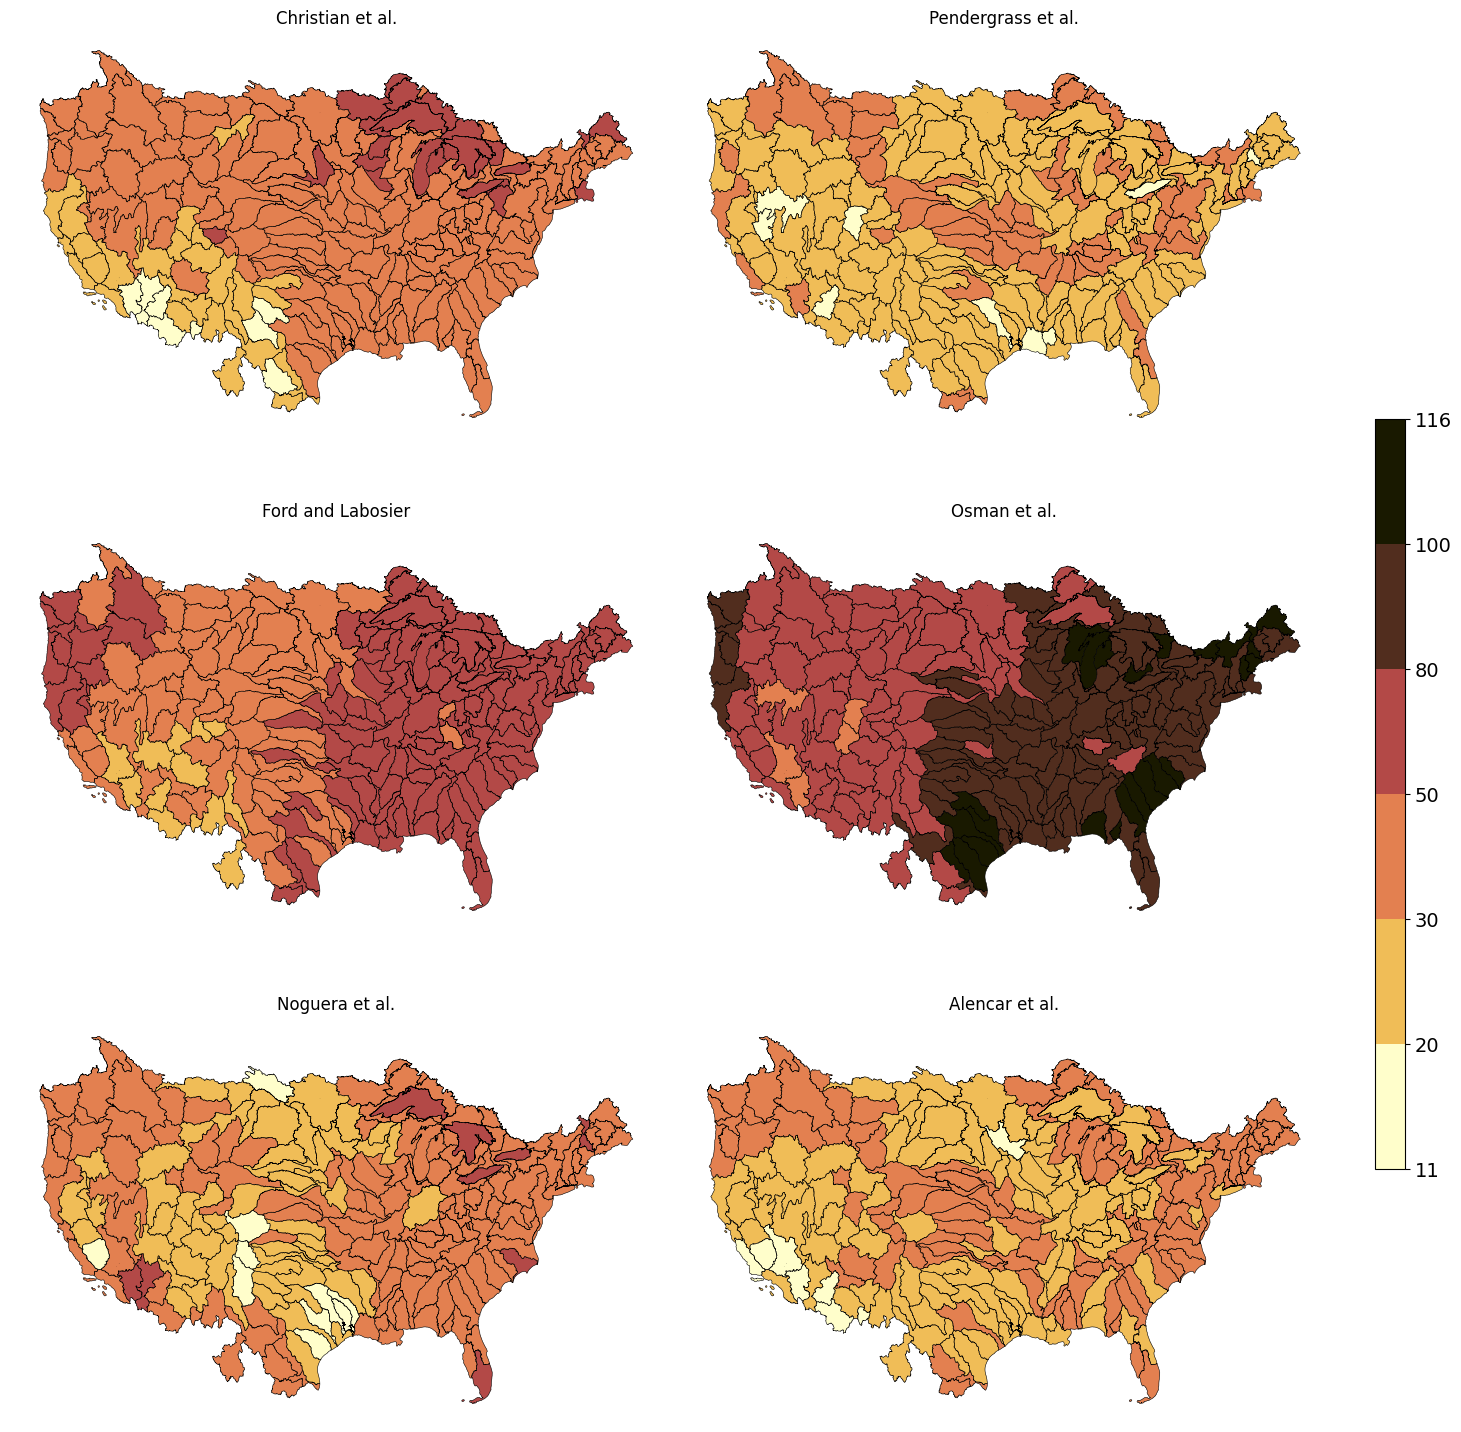

In [9]:
# Initialize the figure and axes
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axs = axs.flatten()

# Plot each method
for ax, method in zip(axs, methods):
    plot_map_on_ax(merged_gdf, method, ax)

# Create a single colorbar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.5])  # [left, bottom, width, height]
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # required for ScalarMappable
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=bounds)
cbar.ax.tick_params(labelsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
plt.show()

In [ ]:
# Save the figure
output_path = 'path'
filepath = os.path.join(output_path, 'Allmethods_discrete.png')
fig.savefig(filepath, dpi=400, bbox_inches='tight')  # dpi=300 for high-res, bbox_inches trims whitespace